<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/Probability_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

 ### reading data


 https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [ ]:
df = pd.read_csv('heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
data_tmp = df[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal','restecg']].copy()
data_tmp['target'] = ((df['num'] > 0)*1).copy()
data_tmp['sex'] = (df['sex'] == 'Male')*1
data_tmp['fbs'] = (df['fbs'])*1
data_tmp['exang'] = (df['exang'])*1

data_tmp['cp'].replace({'non-anginal':'non_anginal' , 'atypical angina': 'atypical_angina', 'typical angina':'typical_angina'}, inplace =True)
data_tmp['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect'}, inplace =True)
data_tmp['restecg'].replace({'lv hypertrophy':'lv_hypertrophy' , 'st-t abnormality': 'st_t_abnormality'}, inplace =True)

#data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
#              'cholesterol', 'fasting_blood_sugar',
#              'max_heart_rate_achieved', 'exercise_induced_angina',
#              'st_depression', 'st_slope_type', 'num_major_vessels',
#              'thalassemia_type', 'target']
data_tmp.head(15)

,age,sex,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,restecg,target
0,63,1,typical_angina,145.0,233.0,1,150.0,0,2.3,downsloping,0.0,fixed_defect,lv_hypertrophy,0
1,67,1,asymptomatic,160.0,286.0,0,108.0,1,1.5,flat,3.0,normal,lv_hypertrophy,1
2,67,1,asymptomatic,120.0,229.0,0,129.0,1,2.6,flat,2.0,reversable_defect,lv_hypertrophy,1
3,37,1,non_anginal,130.0,250.0,0,187.0,0,3.5,downsloping,0.0,normal,normal,0
4,41,0,atypical_angina,130.0,204.0,0,172.0,0,1.4,upsloping,0.0,normal,lv_hypertrophy,0
5,56,1,atypical_angina,120.0,236.0,0,178.0,0,0.8,upsloping,0.0,normal,normal,0
6,62,0,asymptomatic,140.0,268.0,0,160.0,0,3.6,downsloping,2.0,normal,lv_hypertrophy,1
7,57,0,asymptomatic,120.0,354.0,0,163.0,1,0.6,upsloping,0.0,normal,normal,0
8,63,1,asymptomatic,130.0,254.0,0,147.0,0,1.4,flat,1.0,reversable_defect,lv_hypertrophy,1
9,53,1,asymptomatic,140.0,203.0,1,155.0,1,3.1,downsloping,0.0,reversable_defect,lv_hypertrophy,1


In [ ]:
training_data = data_tmp[['target',
 'exang',
 'cp',
 'oldpeak',
 'thalch',
 'ca',
 'slope',
 'thal',
 'sex',
 'age',
 'trestbps',
 'restecg']]

In [ ]:
training_data.head()

,target,exang,cp,oldpeak,thalch,ca,slope,thal,sex,age,trestbps,restecg
0,0,0,typical_angina,2.3,150.0,0.0,downsloping,fixed_defect,1,63,145.0,lv_hypertrophy
1,1,1,asymptomatic,1.5,108.0,3.0,flat,normal,1,67,160.0,lv_hypertrophy
2,1,1,asymptomatic,2.6,129.0,2.0,flat,reversable_defect,1,67,120.0,lv_hypertrophy
3,0,0,non_anginal,3.5,187.0,0.0,downsloping,normal,1,37,130.0,normal
4,0,0,atypical_angina,1.4,172.0,0.0,upsloping,normal,0,41,130.0,lv_hypertrophy


In [ ]:
training_data.shape

(920, 12)

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    920 non-null    int64  
 1   exang     865 non-null    object 
 2   cp        920 non-null    object 
 3   oldpeak   858 non-null    float64
 4   thalch    865 non-null    float64
 5   ca        309 non-null    float64
 6   slope     611 non-null    object 
 7   thal      434 non-null    object 
 8   sex       920 non-null    int64  
 9   age       920 non-null    int64  
 10  trestbps  861 non-null    float64
 11  restecg   918 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 86.4+ KB


In [ ]:
training_data[['restecg']].value_counts()

restecg         
normal              551
lv_hypertrophy      188
st_t_abnormality    179
dtype: int64

In [ ]:
training_data.dropna(inplace=True)

<ipython-input-15-4f08539ba747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(inplace=True)


In [ ]:
training_data.head()

,target,exang,cp,oldpeak,thalch,ca,slope,thal,sex,age,trestbps,restecg
0,0,0,typical_angina,2.3,150.0,0.0,downsloping,fixed_defect,1,63,145.0,lv_hypertrophy
1,1,1,asymptomatic,1.5,108.0,3.0,flat,normal,1,67,160.0,lv_hypertrophy
2,1,1,asymptomatic,2.6,129.0,2.0,flat,reversable_defect,1,67,120.0,lv_hypertrophy
3,0,0,non_anginal,3.5,187.0,0.0,downsloping,normal,1,37,130.0,normal
4,0,0,atypical_angina,1.4,172.0,0.0,upsloping,normal,0,41,130.0,lv_hypertrophy


In [ ]:
training_data = training_data.astype({'exang': 'int32'})
training_data

,target,exang,cp,oldpeak,thalch,ca,slope,thal,sex,age,trestbps,restecg
0,0,0,typical_angina,2.3,150.0,0.0,downsloping,fixed_defect,1,63,145.0,lv_hypertrophy
1,1,1,asymptomatic,1.5,108.0,3.0,flat,normal,1,67,160.0,lv_hypertrophy
2,1,1,asymptomatic,2.6,129.0,2.0,flat,reversable_defect,1,67,120.0,lv_hypertrophy
3,0,0,non_anginal,3.5,187.0,0.0,downsloping,normal,1,37,130.0,normal
4,0,0,atypical_angina,1.4,172.0,0.0,upsloping,normal,0,41,130.0,lv_hypertrophy
...,...,...,...,...,...,...,...,...,...,...,...,...
299,1,0,asymptomatic,3.4,141.0,2.0,flat,reversable_defect,1,68,144.0,normal
300,1,1,asymptomatic,1.2,115.0,1.0,flat,reversable_defect,1,57,130.0,normal
301,1,0,atypical_angina,0.0,174.0,1.0,flat,normal,0,57,130.0,lv_hypertrophy
508,1,1,asymptomatic,1.5,98.0,0.0,flat,reversable_defect,1,47,150.0,normal


In [ ]:
training_data_ohe = pd.get_dummies(training_data,drop_first=True).sample(frac=1)
training_data_ohe

,target,exang,oldpeak,thalch,ca,sex,age,trestbps,cp_atypical_angina,cp_non_anginal,cp_typical_angina,slope_flat,slope_upsloping,thal_normal,thal_reversable_defect,restecg_normal,restecg_st_t_abnormality
52,1,0,0.0,153.0,1.0,1,44,112.0,0,0,0,0,1,1,0,0,0
46,0,0,0.6,123.0,0.0,1,51,110.0,0,1,0,0,1,1,0,1,0
44,1,0,0.0,169.0,0.0,0,61,130.0,0,0,0,0,1,1,0,0,0
43,0,0,1.6,157.0,0.0,1,59,150.0,0,1,0,0,1,1,0,1,0
218,0,0,2.0,122.0,2.0,0,64,130.0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0.0,156.0,0.0,1,54,108.0,1,0,0,0,1,0,1,1,0
231,1,1,3.4,117.0,0.0,0,55,180.0,0,0,0,1,0,1,0,0,1
97,1,0,2.6,157.0,2.0,0,60,150.0,0,0,0,1,0,0,1,0,0
277,0,0,0.0,152.0,0.0,0,39,138.0,0,1,0,1,0,1,0,1,0


In [ ]:
train = training_data_ohe[0:99]
test = training_data_ohe[100:199]
valid = training_data_ohe[200:299]

In [ ]:
train.shape,test.shape,valid.shape

((99, 17), (99, 17), (99, 17))

In [ ]:
X_train = train.drop(columns = ['target'],axis=1).values
y_train = train.target.values

X_test = test.drop(columns = ['target'],axis=1).values
y_test = test.target.values

X_valid = valid.drop(columns = ['target'],axis=1).values
y_valid = valid.target.values

In [ ]:
print(X_train)
print(y_train)

[[  0.    0.  153.  ...   0.    0.    0. ]
 [  0.    0.6 123.  ...   0.    1.    0. ]
 [  0.    0.  169.  ...   0.    0.    0. ]
 ...
 [  1.    2.2 131.  ...   1.    0.    0. ]
 [  1.    1.2 144.  ...   0.    0.    0. ]
 [  1.    2.8 142.  ...   1.    0.    0. ]]
[1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0
 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1]


In [ ]:
model_to_classifier_mapping = {
    'svc': SVC(probability=True),
    'rf': RandomForestClassifier(),
    'lr':LogisticRegression(solver='liblinear')
}

training svc


<ipython-input-38-bf0eee3eea16>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_prob_train)
<ipython-input-38-bf0eee3eea16>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_prob_test)


training rf


<ipython-input-38-bf0eee3eea16>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_prob_train)
<ipython-input-38-bf0eee3eea16>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_prob_test)


training lr


<ipython-input-38-bf0eee3eea16>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_prob_train)
<ipython-input-38-bf0eee3eea16>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_prob_test)


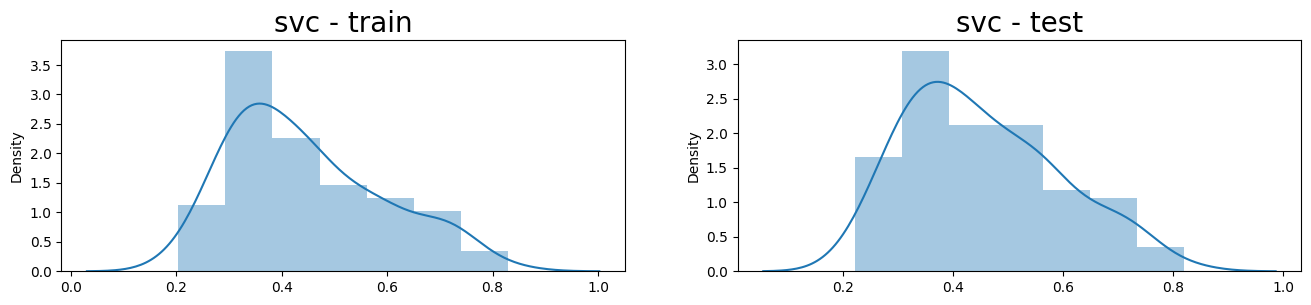

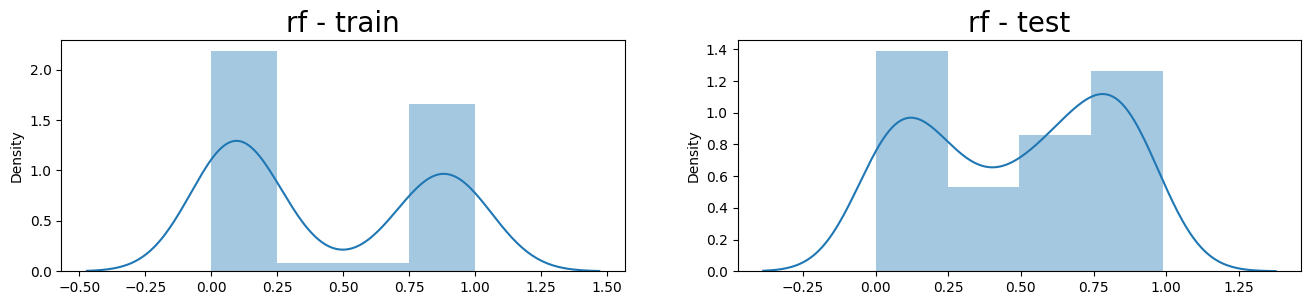

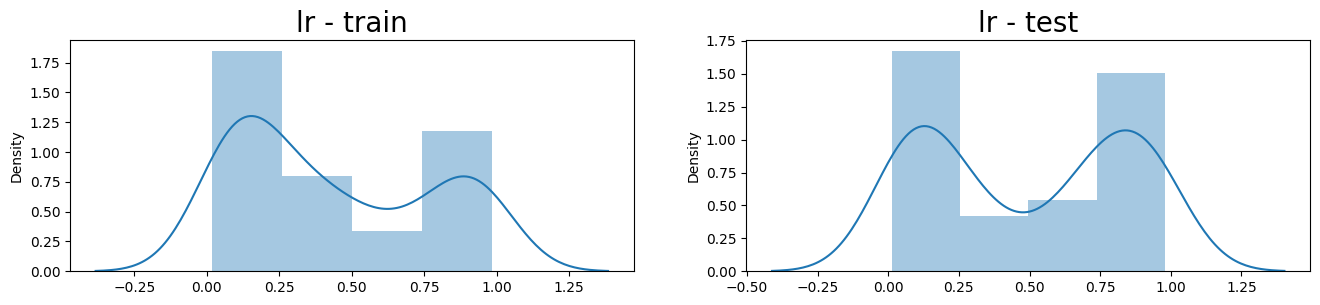

In [ ]:
model_to_prob_mapping = {}
model_str_trained_model_mapping = {}

for model_str,model_ref in model_to_classifier_mapping.items():
  print(f'training {model_str}')

  classifier = model_ref

  # train model
  classifier.fit(X_train,y_train)

  # get predicted probabilities
  pred_prob_train = classifier.predict_proba(X_train)[:,1]
  pred_prob_test = classifier.predict_proba(X_test)[:,1]
  pred_prob_valid = classifier.predict_proba(X_valid)[:,1]


  model_to_prob_mapping[model_str] = {'train':pred_prob_train,'test':pred_prob_test,'valid':pred_prob_valid}

  plt.figure(figsize=(16,3))

  plt.subplot(1,2,1)
  sns.distplot(pred_prob_train)
  plt.title(f"{model_str} - train", fontsize=20)

  plt.subplot(1,2,2)
  sns.distplot(pred_prob_test)
  plt.title(f"{model_str} - test", fontsize=20)

  model_str_trained_model_mapping[model_str] = classifier

## Predicted Probebilities vs Empirical Probabilities

In [ ]:
# Plot reliability curve

running for svc
[0.0, 0.2777777777777778, 0.3333333333333333, 0.5294117647058824, 0.7272727272727273, 0.5454545454545454, 0.6666666666666666, 0.8571428571428571, nan]
[0.25467694877602837, 0.3212217324156683, 0.3877665160553082, 0.45431129969494816, 0.5208560833345881, 0.587400866974228, 0.6539456506138679, 0.7204904342535079, 0.7870352178931477]
running for rf
[0.06666666666666667, 0.0, 0.14285714285714285, 0.6, 0.6666666666666666, 0.5555555555555556, 0.6, 0.9375, 0.8888888888888888]
[0.055, 0.165, 0.275, 0.385, 0.495, 0.605, 0.7150000000000001, 0.825, 0.935]
running for lr
[0.043478260869565216, 0.0, 0.0, 1.0, 0.5, 0.6, 0.7, 0.75, 0.9047619047619048]
[0.06549477903295141, 0.17297352107820269, 0.28045226312345395, 0.38793100516870527, 0.49540974721395653, 0.6028884892592079, 0.7103672313044591, 0.8178459733497103, 0.9253247153949617]


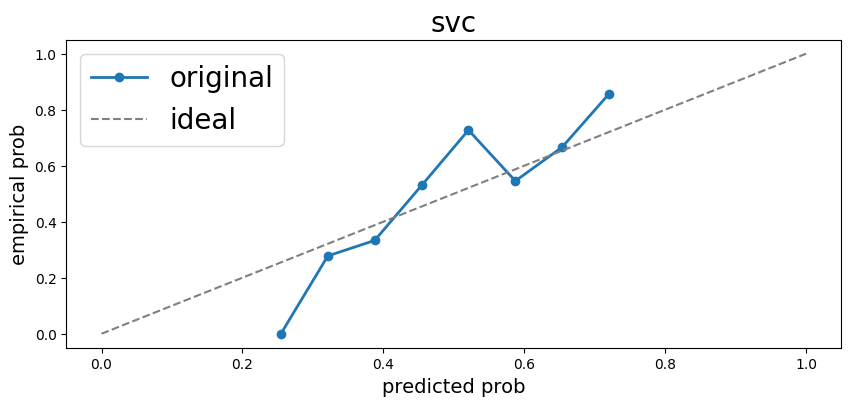

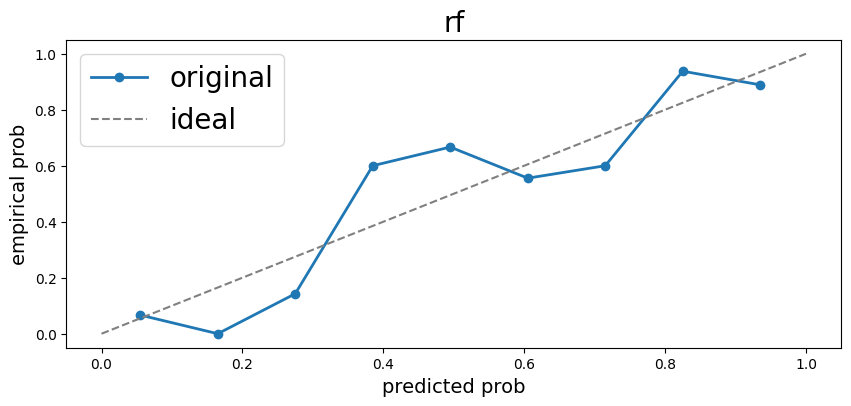

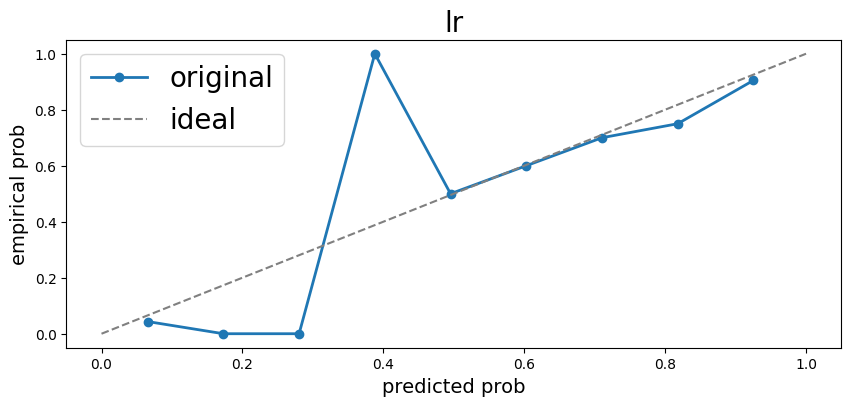

In [ ]:
for model_str,pred_prob_dict in model_to_prob_mapping.items():
  print(f'running for {model_str}')
  pred_probs = pred_prob_dict['test']

  pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)
  empirical_probs = []
  pred_probs_midpoints = []
  #print(pred_probs)
  #print(pred_probs_space)
  for i in range(len(pred_probs_space)-1):
    empirical_probs.append(
        np.mean(
          y_test[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]
        )
    )

    pred_probs_midpoints.append((pred_probs_space[i]+pred_probs_space[i+1])/2) # take mid moing in pred prob space

  print(empirical_probs)
  print(pred_probs_midpoints)
  plt.figure(figsize=(10,4))
  plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
  plt.title(f"{model_str}", fontsize=20)
  plt.xlabel('predicted prob', fontsize=14)
  plt.ylabel('empirical prob', fontsize=14)

  plt.plot([0,1],[0,1],linestyle='--',color='gray')

  plt.legend(['original', 'ideal'], fontsize=20)

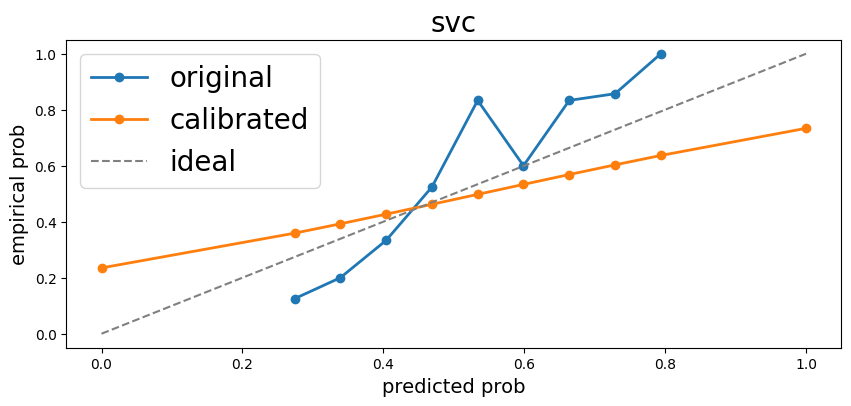

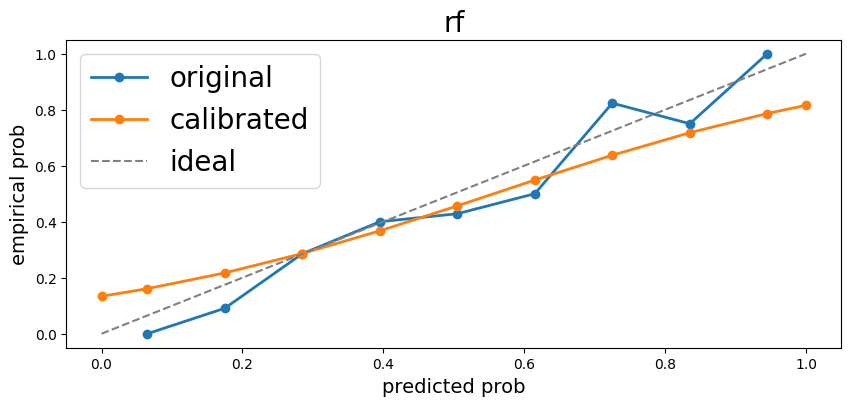

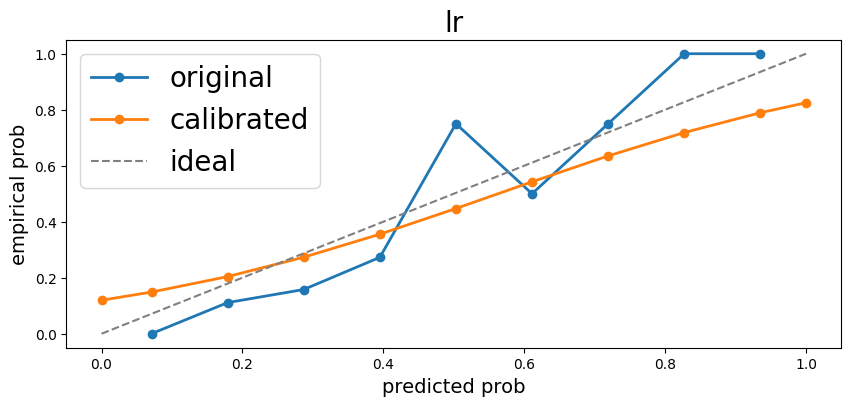

In [ ]:
model_str_to_calibrator = {}

for model_str,pred_prob_dict in model_to_prob_mapping.items():
  calib_lr_model = LogisticRegression()
  calib_lr_model.fit(pred_prob_dict['test'].reshape(-1,1),y_test)
  # here independent variable = predicted probabilities
  # dependent variable is actual label in data

  pred_probs = pred_prob_dict['valid']

  pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

  empirical_probs = []
  pred_probs_midpoints = []

  for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_valid[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

  calibrated_probs = calib_lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1] # probability post calibration
  plt.figure(figsize=(10,4))
  plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
  plt.title(f"{model_str}", fontsize=20)
  plt.xlabel('predicted prob', fontsize=14)
  plt.ylabel('empirical prob', fontsize=14)

  plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')

  plt.plot([0,1],[0,1],linestyle='--',color='gray')

  plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)

  model_str_to_calibrator[model_str] = lr_model